## Synthetic Fraud Detection Analysis

### Project Overview

This dataset is a synthetic fraud detection dataset designed to simulate real-world financial transactions. It contains artificially generated transaction records that closely resemble genuine banking and digital payment behavior, without exposing any real customer information.

The dataset is used to study fraud patterns, transaction behavior, and risk indicators. Because it is synthetic, it is safe for analysis, model development, and academic or portfolio projects while still reflecting realistic fraud scenarios such as abnormal transfers, sudden balance changes, and high-value transactions.

## Features
Helps identify suspicious transaction behavior such as large or unusual payments.
Detects abnormal balance fluctuations often seen in fraudulent activity.
Identifies unusual behavior patterns compared to normal user activity.
Fraud often happens during specific time windows, such as late nights or high-frequency bursts.
Large or disproportionate amounts are strong fraud indicators.
Improves model accuracy by highlighting known fraud patterns.

## Solution
This dataset supports the development of fraud detection systems by enabling:                                                                            
*Identification of high-risk transaction types                                                                                                           
*Detection of abnormal transaction amounts                                                                                                               
*Analysis of balance inconsistencies                                                                                                                     
*Handling of highly imbalanced fraud data                                                                                                                
Training and evaluating machine learning models for fraud prediction                                                                                     
Using this dataset, organizations can design models that detect fraud early, reduce financial losses, and minimize false alerts on legitimate users.

### import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data load

In [4]:
df=pd.read_csv("C:\master program in data analytics\FITA\synthetic fraud dataset.csv")

In [5]:
df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [6]:
print("the data informations are:")
df.info()
print("--------------------------------------------------")
print("Shape of the dataset")
df.shape
print("---------------------------------------------------")
print("the description of dataset:")
df.describe()


the data informations are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
--------------------------------------------------
Shape of the dataset
---------------------------------------------------
the description of dataset:


,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213880,23.000000,0.998737,0.999603,1.000000


## Cleaning the dataset

In [7]:
df.isnull().sum()

transaction_id       0
user_id              0
amount               0
transaction_type     0
merchant_category    0
country              0
hour                 0
device_risk_score    0
ip_risk_score        0
is_fraud             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Count of fraud vs legitimate transactions
print(df['is_fraud'].value_counts())

# Fraud ratio
fraud_ratio = df['is_fraud'].mean()
print("Fraud ratio:", fraud_ratio)

is_fraud
0    9500
1     500
Name: count, dtype: int64
Fraud ratio: 0.05


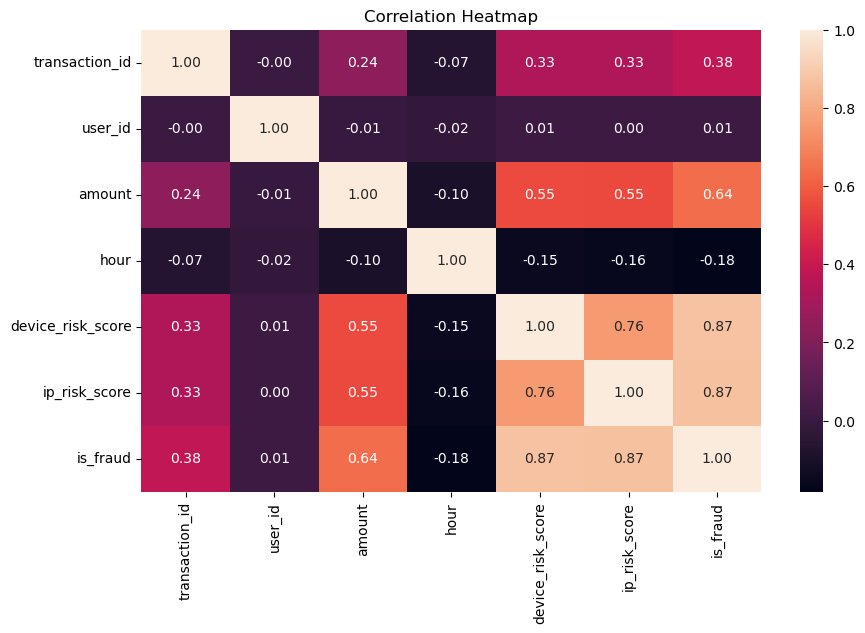

In [16]:
num_df=df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

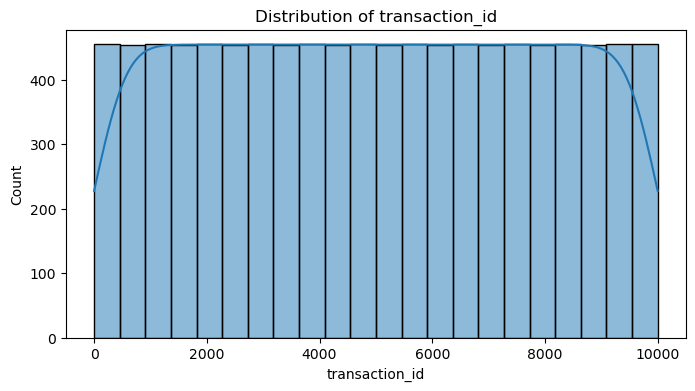

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df[df.columns[0]], kde=True)
plt.title(f"Distribution of {df.columns[0]}")
plt.show()


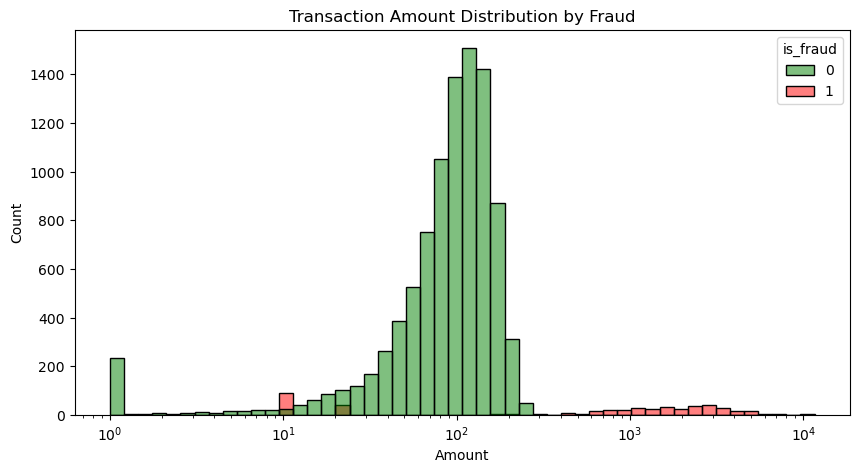

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amount', hue='is_fraud', bins=50, log_scale=True, palette=['green','red'])
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

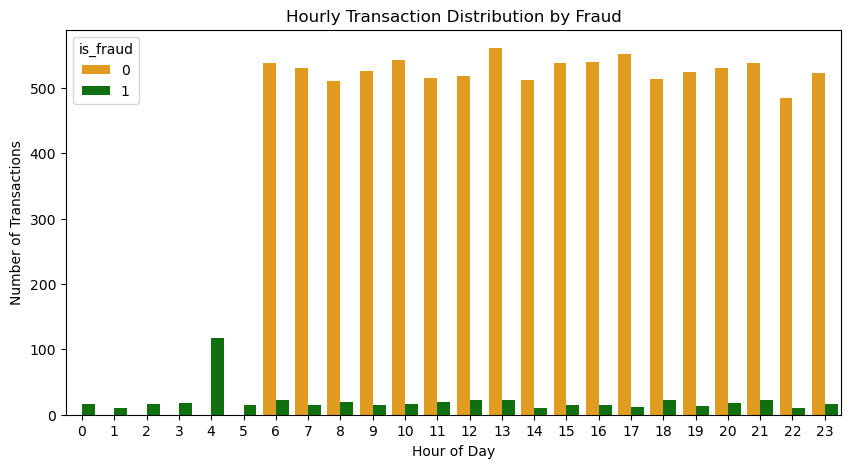

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', hue='is_fraud', palette=['orange','green'])
plt.title("Hourly Transaction Distribution by Fraud")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()


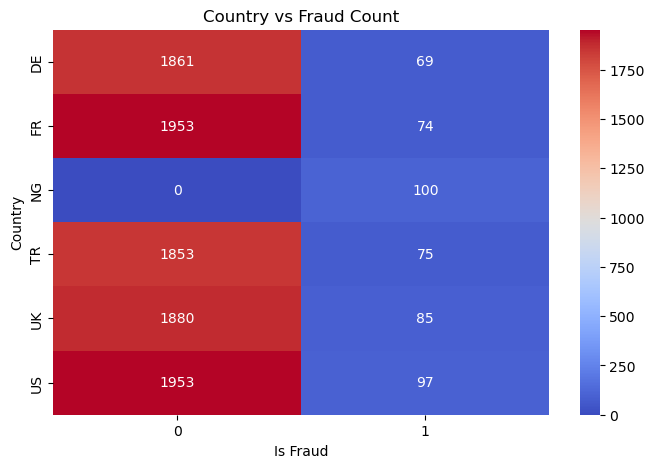

In [28]:
country_fraud = df.pivot_table(index='country', columns='is_fraud', values='transaction_id', aggfunc='count').fillna(0)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(country_fraud, annot=True, fmt='g', cmap='coolwarm')
plt.title("Country vs Fraud Count")
plt.xlabel("Is Fraud")
plt.ylabel("Country")
plt.show()